
# Learning from data. Paint with Data. Data as material.

## Working with Seaborn

## Seaborn is a statistical data visualization library

Source: https://www.kaggle.com/learn/data-visualization

https://www.kaggle.com/alexisbcook


### Set up the notebook:

There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment. It's not important to understand these lines of code now, and so we won't go into the details just yet. (Notice that it returns as output: Setup Complete.)

### More examples with Seaborn can be found here:

https://seaborn.pydata.org/index.html

You can browse the example gallery to see some of the things that you can do with seaborn, and then check out the tutorials or API reference to find out how.

https://seaborn.pydata.org/examples/index.html

#1. Basics

In [4]:
import os
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CLASS_ID = "Curious explorer"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CLASS_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print("Setup Complete")

Setup Complete


### Get the Data from online source

First, download the Data locally as a CVS file and then uplpoad the file in /sample_data



In [3]:
CHOSEN_PATH = os.getcwd()+"/sample_data"
DATAFILE = "jobs_in_data.csv"

def load_chosen_data(chosen_path=CHOSEN_PATH):
    print(CHOSEN_PATH + ".")
    csv_path = os.path.join(chosen_path, DATAFILE)
    return pd.read_csv(csv_path, index_col="job_category", parse_dates=True) #这一列教程里与日期对应，需要 parse_dates=True

### Take a quick look at the data structure

In [4]:
! ls /content/sample_data/

airlines.csv		      fifa.csv		     museum_visitors.csv
airports.csv		      flight_delays.csv      netflix_titles.csv
anscombe.json		      insurance.csv	     README.md
california_housing_test.csv   jobs_in_data.csv	     spotify.csv
california_housing_train.csv  mnist_test.csv
cancer.csv		      mnist_train_small.csv


In [5]:
chosen_data = load_chosen_data()
chosen_data.head()

/content/sample_data.


work_year             job_title  \
job_category                                                      
Data Engineering                     2023  Data DevOps Engineer   
Data Architecture and Modeling       2023        Data Architect   
Data Architecture and Modeling       2023        Data Architect   
Data Science and Research            2023        Data Scientist   
Data Science and Research            2023        Data Scientist   

                               salary_currency  salary  salary_in_usd  \
job_category                                                            
Data Engineering                           EUR   88000          95012   
Data Architecture and Modeling             USD  186000         186000   
Data Architecture and Modeling             USD   81800          81800   
Data Science and Research                  USD  212000         212000   
Data Science and Research                  USD   93300          93300   

                               employee_residence experience_level  \
job_category                                                         
Data Engineering                          Germany        Mid-level   
Data Architecture and Modeling      United States           Senior   
Data Architecture and Modeling      United States           Senior   
Data Science and Research           United States           Senior   
Data Science and Research           United States           Senior   

                               employment_type work_setting company_location  \
job_category                                                                   
Data Engineering                     Full-time       Hybrid          Germany   
Data Architecture and Modeling       Full-time    In-person    United States   
Data Architecture and Modeling       Full-time    In-person    United States   
Data Science and Research            Full-time    In-person    United States   
Data Science and Research            Full-time    In-person    United States   

                               company_size  
job_category                                 
Data Engineering                          L  
Data Architecture and Modeling            M  
Data Architecture and Modeling            M  
Data Science and Research                 M  
Data Science and Research                 M

In [6]:
chosen_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9355 entries, Data Engineering to Data Analysis
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   salary_currency     9355 non-null   object
 3   salary              9355 non-null   int64 
 4   salary_in_usd       9355 non-null   int64 
 5   employee_residence  9355 non-null   object
 6   experience_level    9355 non-null   object
 7   employment_type     9355 non-null   object
 8   work_setting        9355 non-null   object
 9   company_location    9355 non-null   object
 10  company_size        9355 non-null   object
dtypes: int64(3), object(8)
memory usage: 877.0+ KB


In [7]:
chosen_data.describe()

work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000

Saving figure jobs_in_data.csv


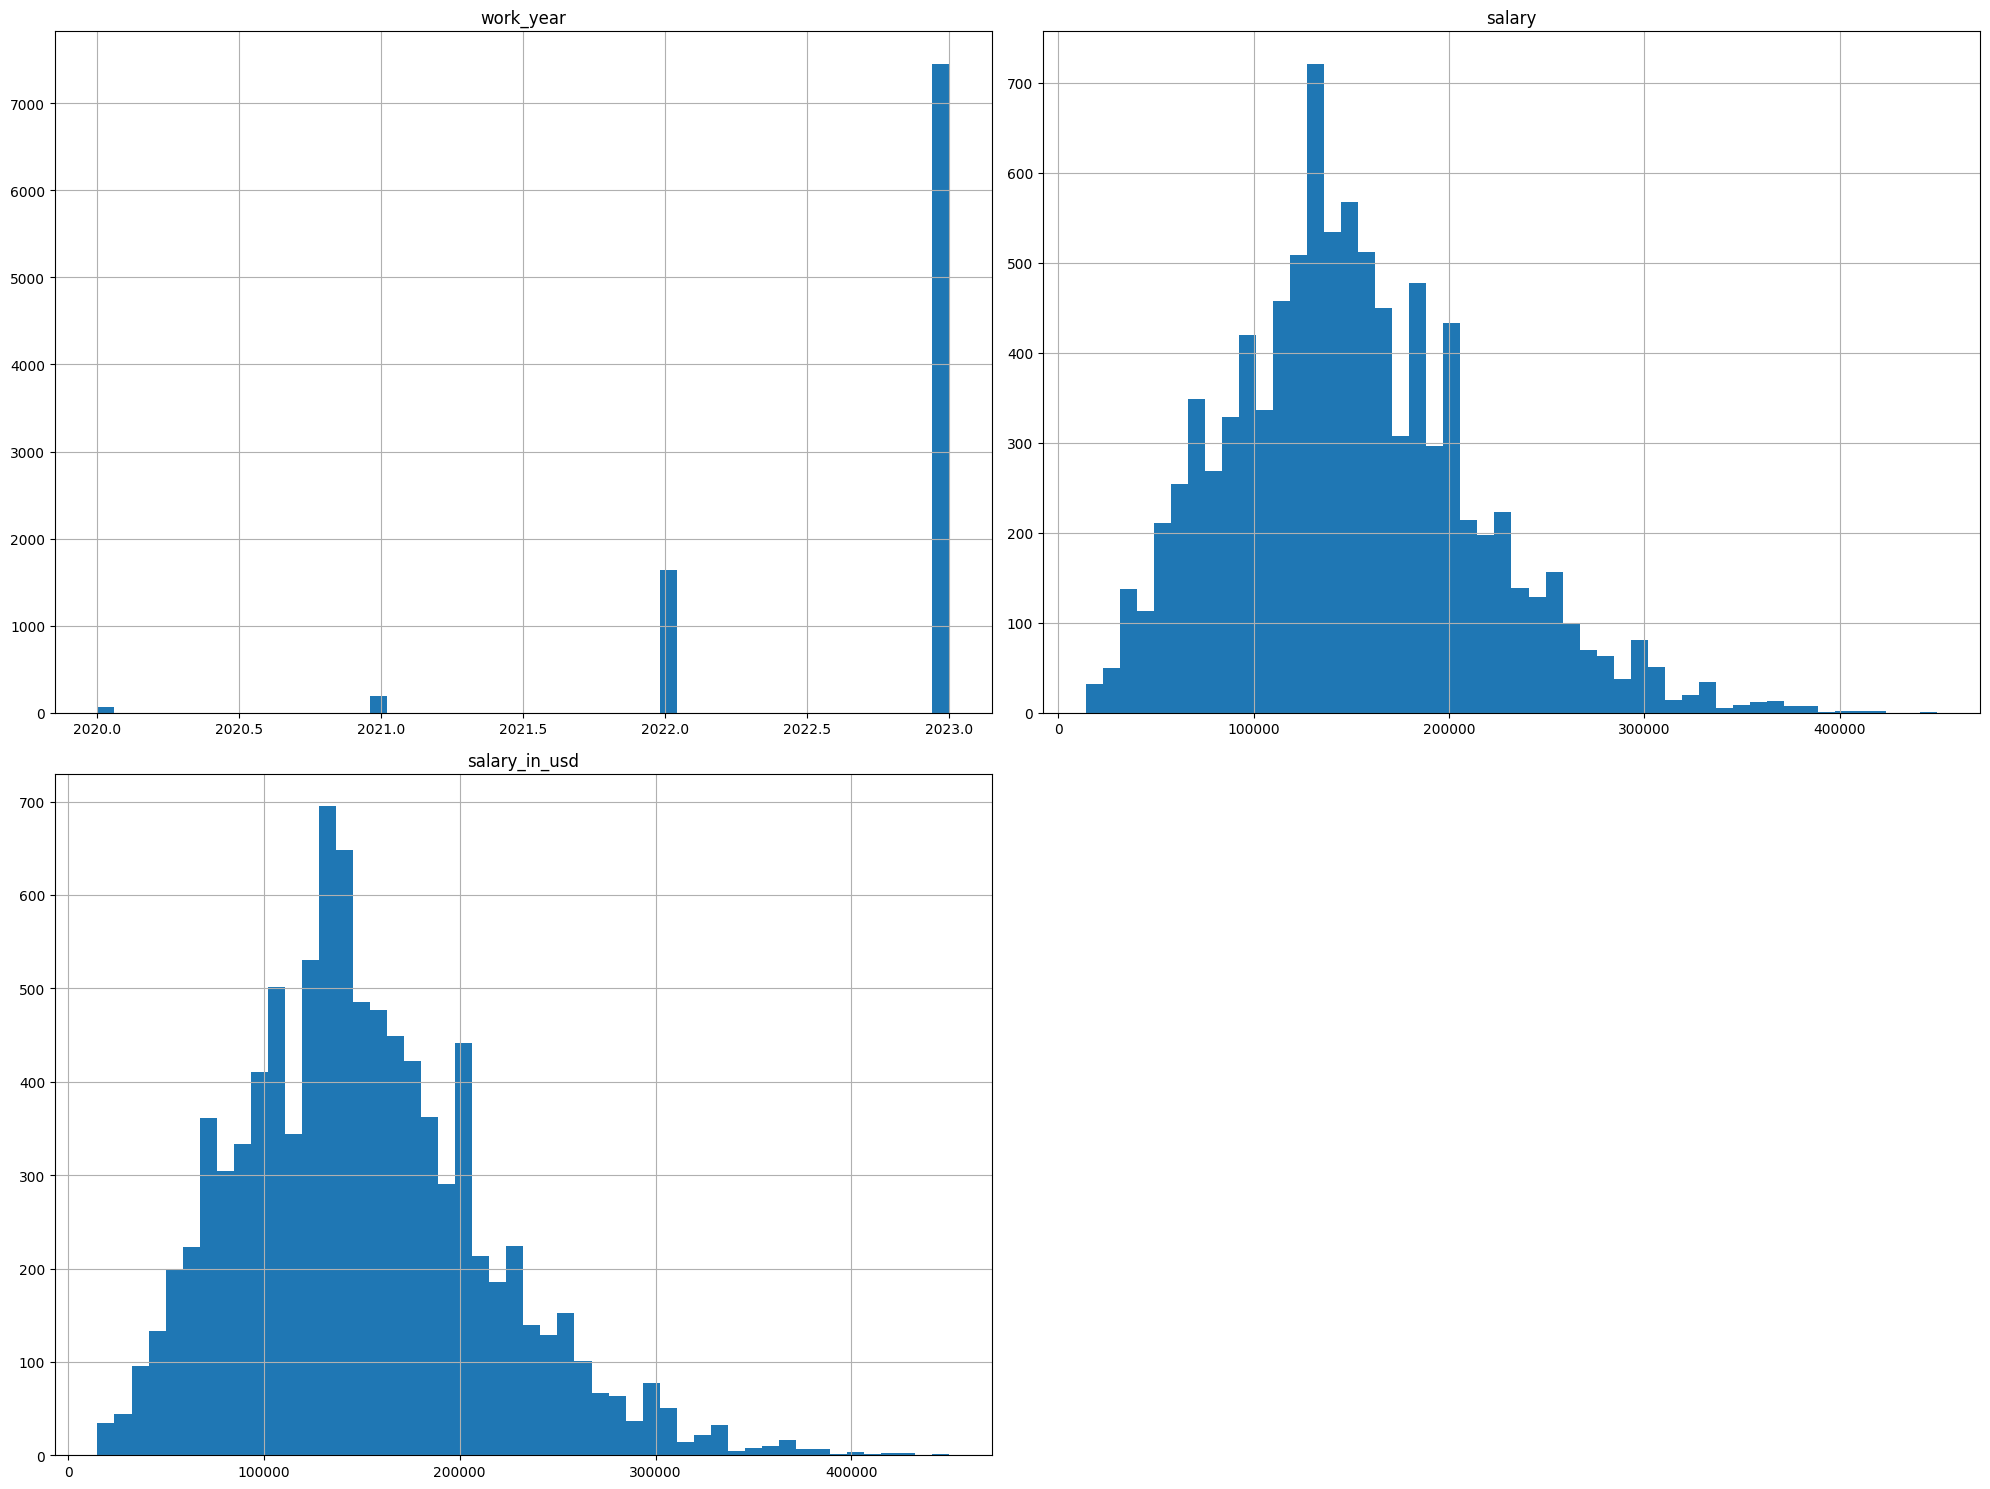

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
chosen_data.hist(bins=50, figsize=(20,15))
save_fig(DATAFILE)
plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Plot the data

Now that the data is loaded into the notebook, you're ready to visualize it!

Run the next code cell without changes to make a line chart. The code may not make sense yet - you'll learn all about it in the next tutorial!

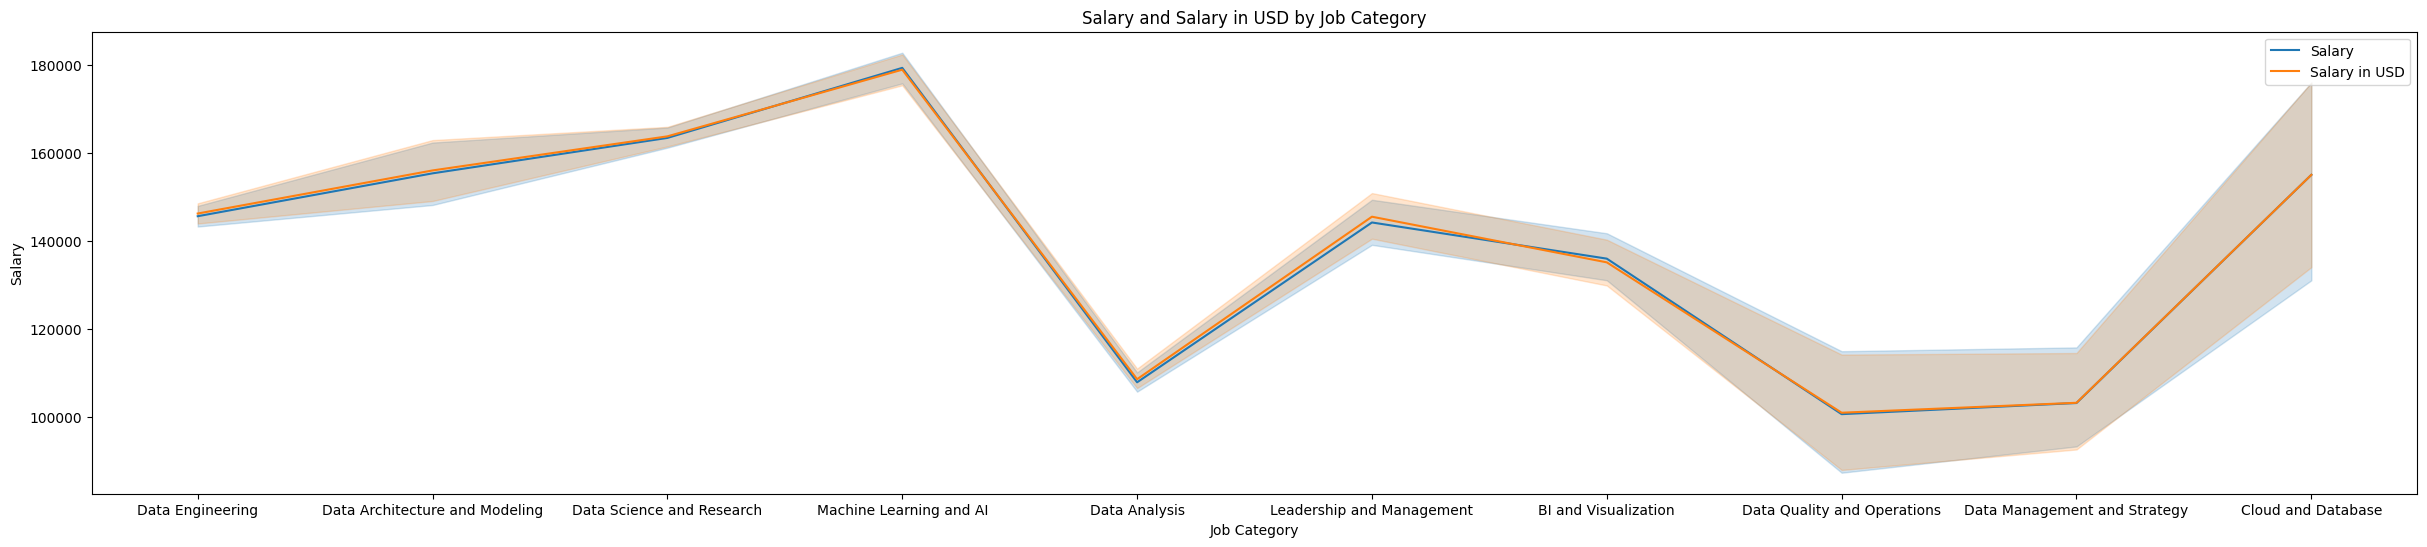

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(30,6))



sns.lineplot(x='job_category', y='salary', data=chosen_data, label='Salary')
sns.lineplot(x='job_category', y='salary_in_usd', data=chosen_data, label='Salary in USD')
plt.xlabel('Job Category')  # 设置 x 轴标签
plt.ylabel('Salary')  # 设置 y 轴标签
plt.title('Salary and Salary in USD by Job Category')  # 设置图形标题
plt.legend()  # 显示图例


Some questions won't require you to write any code. Instead, you'll interpret visualizations.

As an example, consider the question: Considering only the years represented in the dataset, which countries spent at least 5 consecutive years in the #1 ranked spot?

Solution: The only country that meets this criterion is Brazil (code: BRA), as it maintains the highest ranking in 1996-2000. Other countries do spend some time in the number 1 spot, but Brazil is the only country that maintains it for at least five consecutive years.

### New dataset
The dataset for this tutorial tracks global daily streams on the music streaming service Spotify. We focus on five popular songs from 2017 and 2018:

"Shape of You", by Ed Sheeran (link)
"Despacito", by Luis Fonzi (link)
"Something Just Like This", by The Chainsmokers and Coldplay (link)
"HUMBLE.", by Kendrick Lamar (link)
"Unforgettable", by French Montana (link)

In [28]:
CHOSEN_PATH = os.getcwd()+"/sample_data"
DATAFILE = "netflix_titles.csv"

def load_chosen_data(chosen_path=CHOSEN_PATH):
    # Path of the file to read
    csv_path = os.path.join(chosen_path, DATAFILE)
    return pd.read_csv(csv_path, index_col="date_added", parse_dates=True)


# Read the file into a variable spotify_data
netflix_data = load_chosen_data()

### Examine the data
We can print the first five rows of the dataset by using the head command that you learned about in the previous tutorial.

In [29]:
# Print the first 5 rows of the data
netflix_data.head()

show_id     type                  title         director  \
date_added                                                            
2021-09-25      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
2021-09-24      s2  TV Show          Blood & Water              NaN   
2021-09-24      s3  TV Show              Ganglands  Julien Leclercq   
2021-09-24      s4  TV Show  Jailbirds New Orleans              NaN   
2021-09-24      s5  TV Show           Kota Factory              NaN   

                                                         cast        country  \
date_added                                                                     
2021-09-25                                                NaN  United States   
2021-09-24  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2021-09-24  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
2021-09-24                                                NaN            NaN   
2021-09-24  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

            release_year rating   duration  \
date_added                                   
2021-09-25          2020  PG-13     90 min   
2021-09-24          2021  TV-MA  2 Seasons   
2021-09-24          2021  TV-MA   1 Season   
2021-09-24          2021  TV-MA   1 Season   
2021-09-24          2021  TV-MA  2 Seasons   

                                                    listed_in  \
date_added                                                      
2021-09-25                                      Documentaries   
2021-09-24    International TV Shows, TV Dramas, TV Mysteries   
2021-09-24  Crime TV Shows, International TV Shows, TV Act...   
2021-09-24                             Docuseries, Reality TV   
2021-09-24  International TV Shows, Romantic TV Shows, TV ...   

                                                  description  
date_added                                                     
2021-09-25  As her father nears the end of his life, filmm...  
2021-09-24  After crossing paths at a party, a Cape Town t...  
2021-09-24  To protect his family from a powerful drug lor...  
2021-09-24  Feuds, flirtations and toilet talk go down amo...  
2021-09-24  In a city of coaching centers known to train I...

Empty entries will appear as NaN, which is short for "Not a Number".

We can also take a look at the last five rows of the data by making only one small change (where .head() becomes .tail()):

In [30]:
# Print the last five rows of the data
netflix_data.tail()

show_id     type        title         director  \
date_added                                                  
2019-11-20   s8803    Movie       Zodiac    David Fincher   
2019-07-01   s8804  TV Show  Zombie Dumb              NaN   
2019-11-01   s8805    Movie   Zombieland  Ruben Fleischer   
2020-01-11   s8806    Movie         Zoom     Peter Hewitt   
2019-03-02   s8807    Movie       Zubaan      Mozez Singh   

                                                         cast        country  \
date_added                                                                     
2019-11-20  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
2019-07-01                                                NaN            NaN   
2019-11-01  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
2020-01-11  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
2019-03-02  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

            release_year rating   duration  \
date_added                                   
2019-11-20          2007      R    158 min   
2019-07-01          2018  TV-Y7  2 Seasons   
2019-11-01          2009      R     88 min   
2020-01-11          2006     PG     88 min   
2019-03-02          2015  TV-14    111 min   

                                                 listed_in  \
date_added                                                   
2019-11-20                  Cult Movies, Dramas, Thrillers   
2019-07-01          Kids' TV, Korean TV Shows, TV Comedies   
2019-11-01                         Comedies, Horror Movies   
2020-01-11              Children & Family Movies, Comedies   
2019-03-02  Dramas, International Movies, Music & Musicals   

                                                  description  
date_added                                                     
2019-11-20  A political cartoonist, a crime reporter and a...  
2019-07-01  While living alone in a spooky town, a young g...  
2019-11-01  Looking to survive in a world taken over by zo...  
2020-01-11  Dragged from civilian life, a former superhero...  
2019-03-02  A scrappy but poor boy worms his way into a ty...

### Plot the data
Now that the dataset is loaded into the notebook, we need only one line of code to make a line chart!

<Axes: xlabel='date_added'>

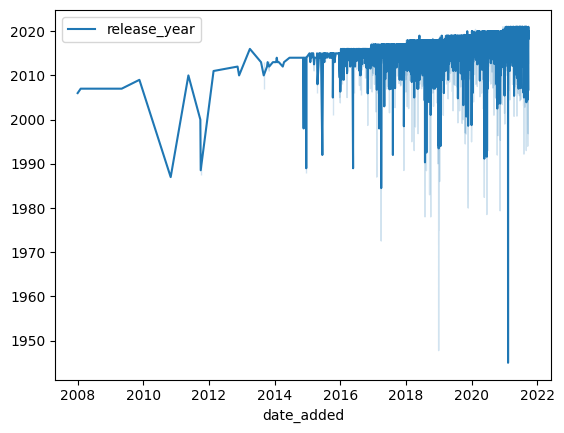

In [31]:
sns.lineplot(data=netflix_data)



As you can see above, the line of code is relatively short and has two main components:

sns.lineplot tells the notebook that we want to create a line chart.
Every command that you learn about in this course will start with sns, which indicates that the command comes from the seaborn package. For instance, we use sns.lineplot to make line charts. Soon, you'll learn that we use sns.barplot and sns.heatmap to make bar charts and heatmaps, respectively.
data=spotify_data selects the data that will be used to create the chart.
Note that you will always use this same format when you create a line chart, and the only thing that changes with a new dataset is the name of the dataset. So, if you were working with a different dataset named financial_data, for instance, the line of code would appear as follows:

Sometimes there are additional details we'd like to modify, like the size of the figure and the title of the chart. Each of these options can easily be set with a single line of code.

<Axes: title={'center': 'release_year and date_added of the shows'}, xlabel='date_added'>

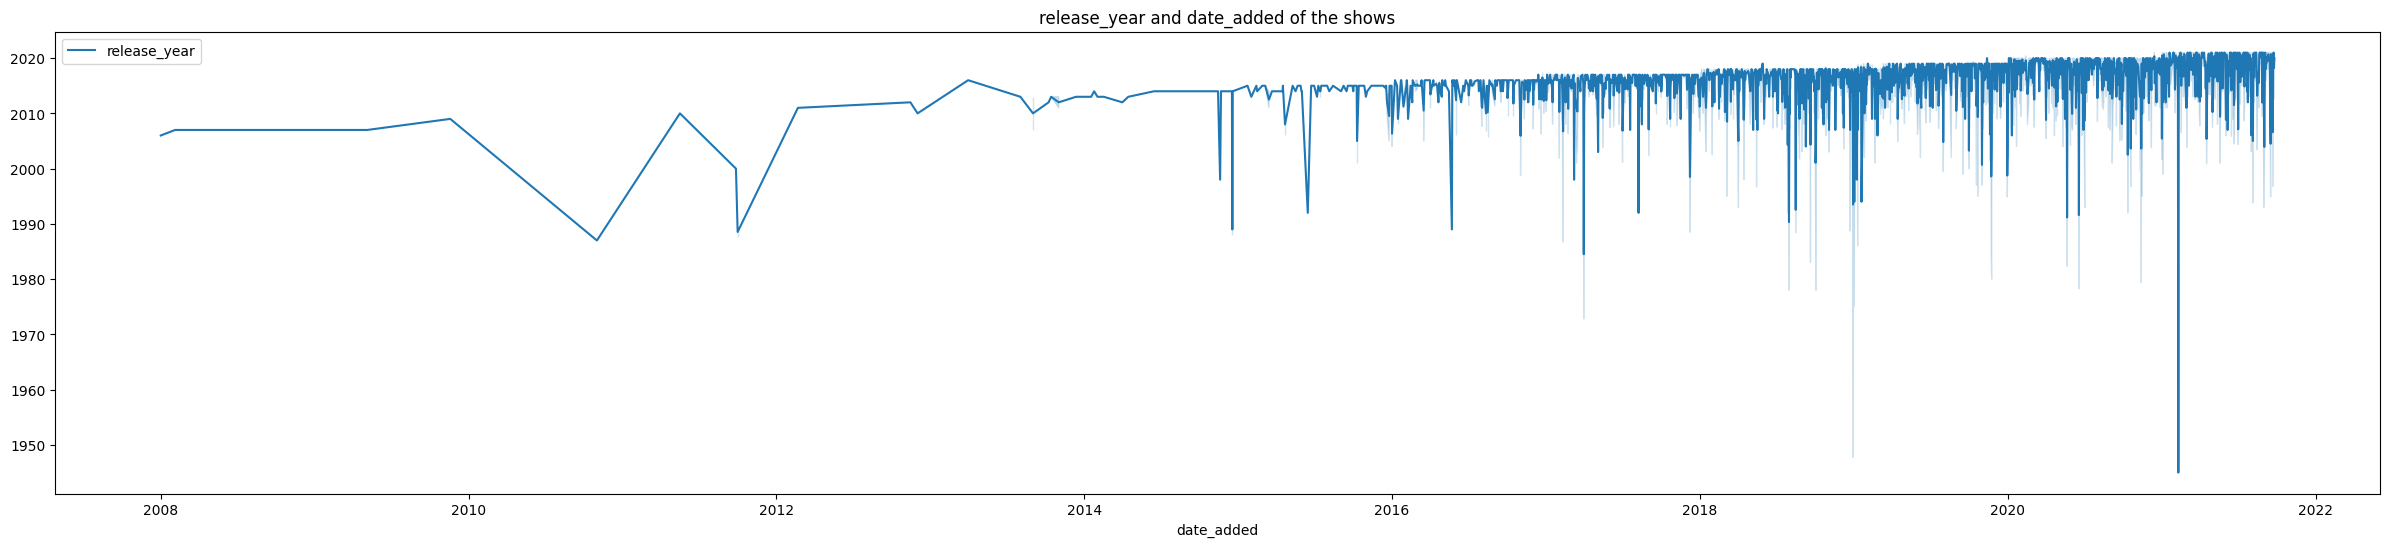

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(30,6))

# Add title
plt.title("release_year and date_added of the shows")

# Line chart showing daily global streams of each song
sns.lineplot(data=netflix_data)

The first line of code sets the size of the figure to 14 inches (in width) by 6 inches (in height). To set the size of any figure, you need only copy the same line of code as it appears. Then, if you'd like to use a custom size, change the provided values of 14 and 6 to the desired width and height.

The second line of code sets the title of the figure. Note that the title must always be enclosed in quotation marks ("...")!



### Plot a subset of the data
So far, you've learned how to plot a line for every column in the dataset. In this section, you'll learn how to plot a subset of the columns.

We'll begin by printing the names of all columns. This is done with one line of code and can be adapted for any dataset by just swapping out the name of the dataset (in this case, spotify_data).



In [34]:
list(netflix_data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In the next code cell, we plot the lines corresponding to the first two columns in the dataset.

Text(0.5, 0, 'release_year')

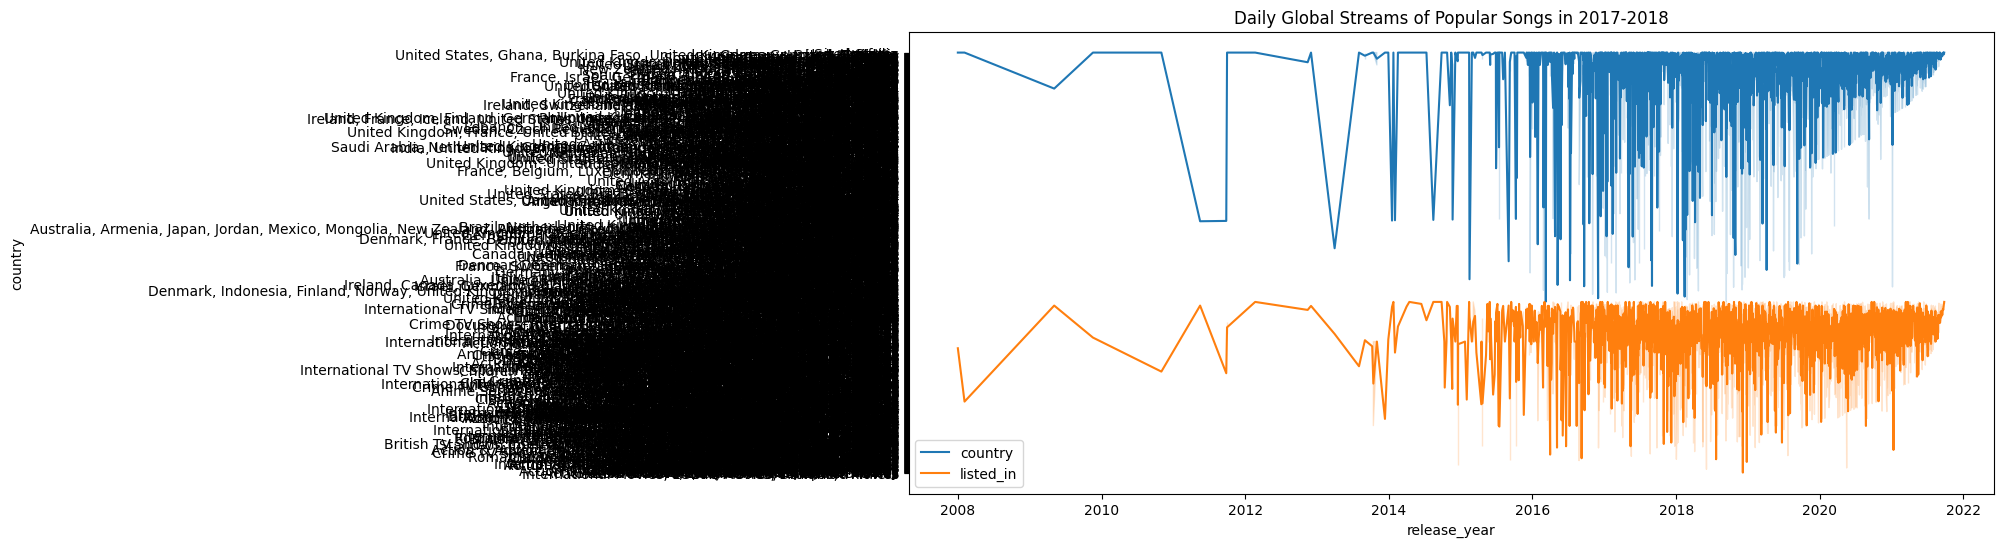

In [39]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=netflix_data['country'], label="country")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=netflix_data['listed_in'], label="listed_in")

# Add label for horizontal axis
plt.xlabel("release_year")

The first two lines of code set the title and size of the figure (and should look very familiar!).

The next two lines each add a line to the line chart. For instance, consider the first one, which adds the line for "Shape of You":

<Axes: xlabel='date_added', ylabel='listed_in'>

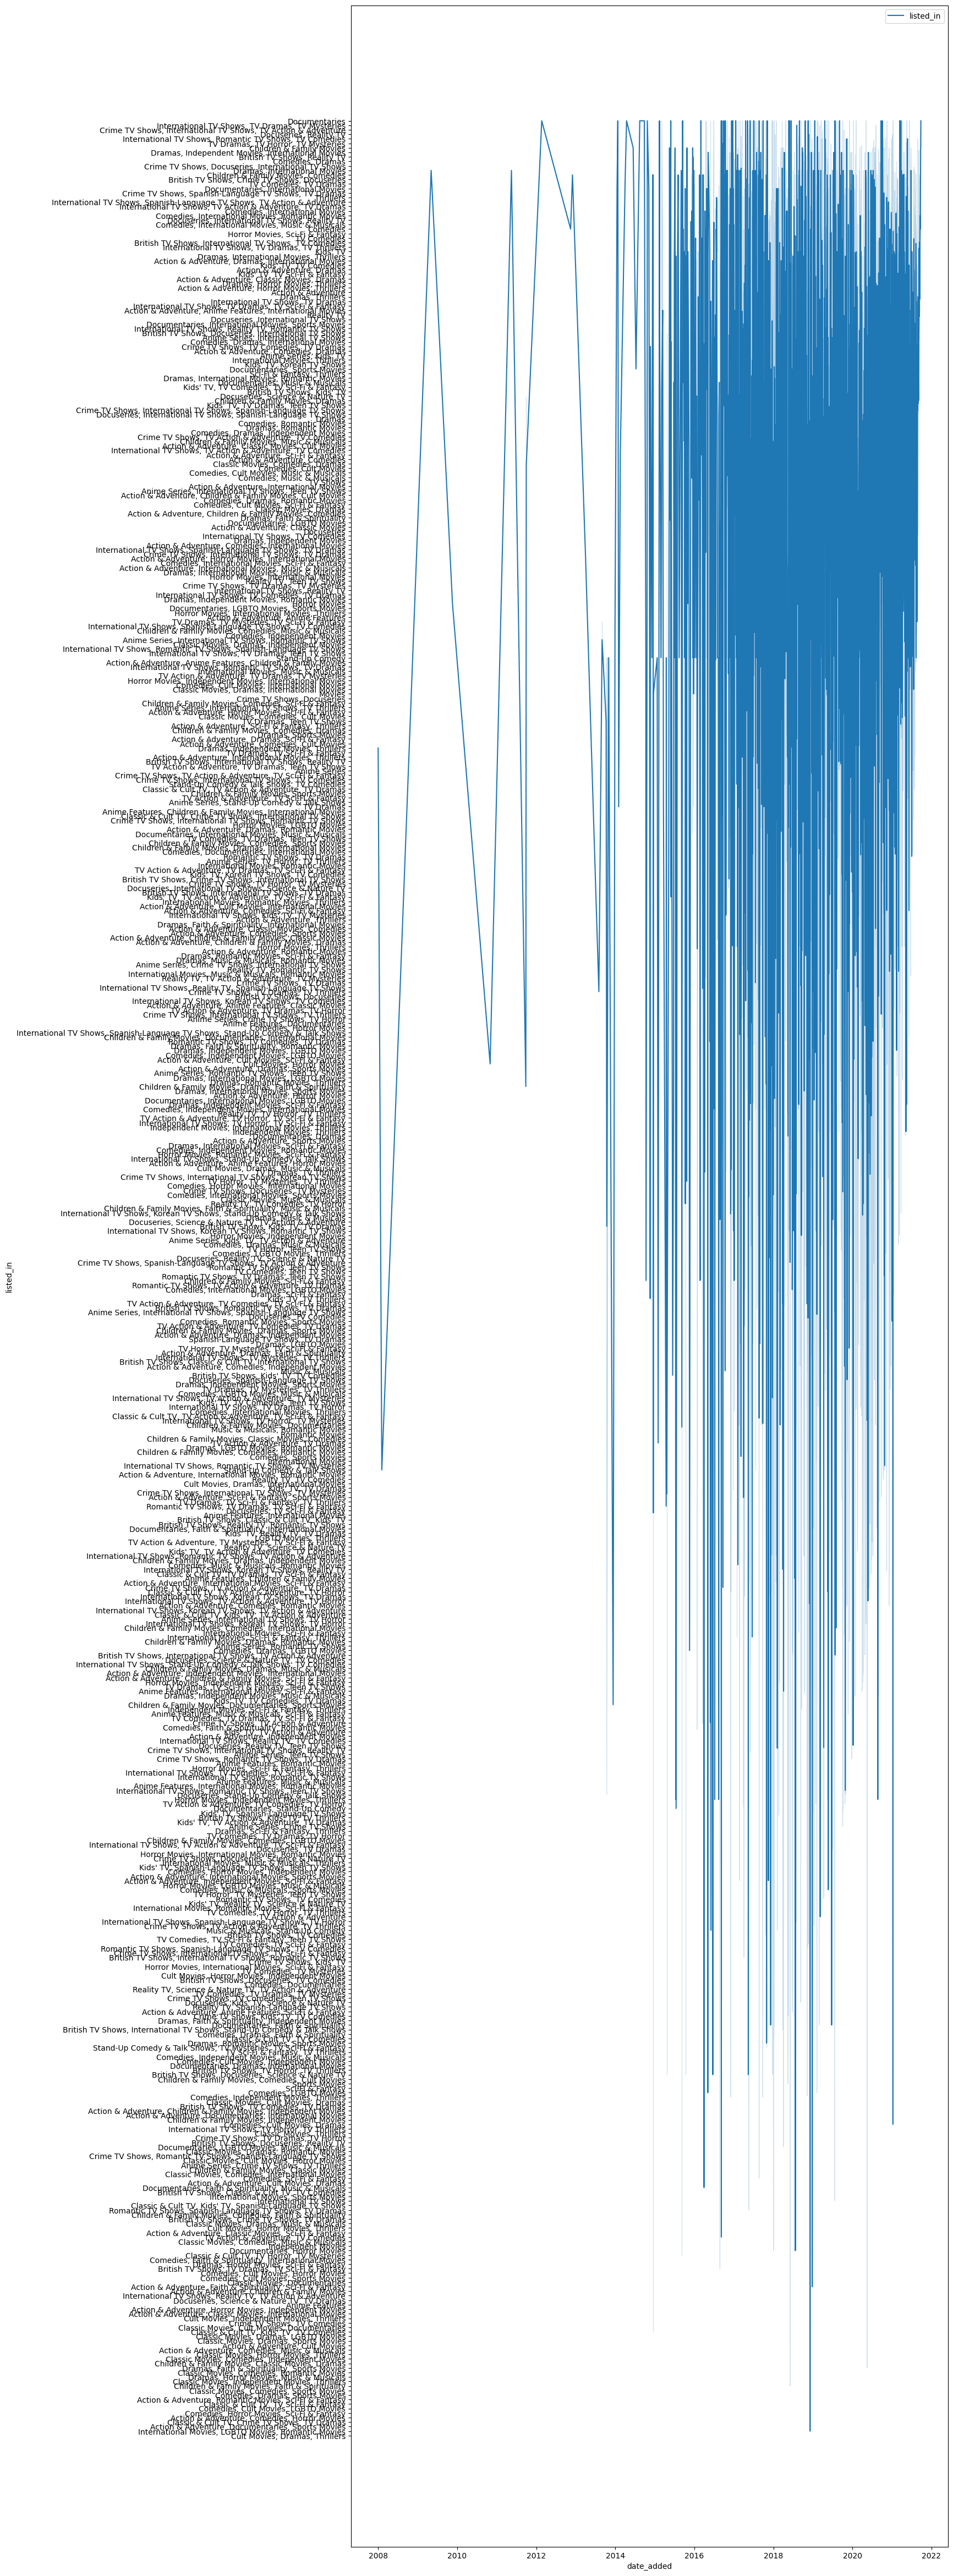

In [41]:
# Line chart showing daily global streams of 'Shape of You'
plt.figure(figsize=(14,60))
sns.lineplot(data=netflix_data['listed_in'], label="listed_in")

This line looks really similar to the code we used when we plotted every line in the dataset, but it has a few key differences:

Instead of setting data=spotify_data, we set data=spotify_data['Shape of You']. In general, to plot only a single column, we use this format with putting the name of the column in single quotes and enclosing it in square brackets. (To make sure that you correctly specify the name of the column, you can print the list of all column names using the command you learned above.)
We also add label="Shape of You" to make the line appear in the legend and set its corresponding label.
The final line of code modifies the label for the horizontal axis (or x-axis), where the desired label is placed in quotation marks ("...").

#2. Exercise: Line Charts

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario. To succeed, you will need to import data into Python, answer questions using the data, and generate **line charts** to understand patterns in the data.

## Scenario

You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

![ex1_museums](https://storage.googleapis.com/kaggle-media/learn/images/pFYL8J1.png)

You will leverage data from the Los Angeles [Data Portal](https://data.lacity.org/) that tracks monthly visitors to each museum.  

![ex1_xlsx](https://storage.googleapis.com/kaggle-media/learn/images/mGWYlym.png)

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [6]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [8]:
# Set up code checking
import os
if not os.path.exists("./sample_data/museum_visitors.csv"):
    os.symlink("../sample_data/data-for-datavis/museum_visitors.csv", "../sample_data/museum_visitors.csv")

print("Setup Complete")

Setup Complete


## Step 1: Load the data

Your first assignment is to read the LA Museum Visitors data file into `museum_data`.  Note that:
- The filepath to the dataset is stored as `museum_filepath`.  Please **do not** change the provided value of the filepath.
- The name of the column to use as row labels is `"Date"`.  (This can be seen in cell A1 when the file is opened in Excel.)

To help with this, you may find it useful to revisit some relevant code from the tutorial, which we have pasted below:

```python
# Path of the file to read
spotify_filepath = "./sample_data/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
```

The code you need to write now looks very similar!

In [9]:
# Path of the file to read
museum_filepath = "./sample_data/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col="Date", parse_dates=True)


## Step 2: Review the data

Use a Python command to print the last 5 rows of the data.

In [45]:
# Print the last five rows of the data
museum_data.tail()# Your code here

Avila Adobe  Firehouse Museum  Chinese American Museum  \
Date                                                                 
2018-07-01        23136              4191                     2620   
2018-08-01        20815              4866                     2409   
2018-09-01        21020              4956                     2146   
2018-10-01        19280              4622                     2364   
2018-11-01        17163              4082                     2385   

            America Tropical Interpretive Center  
Date                                              
2018-07-01                                  4718  
2018-08-01                                  3891  
2018-09-01                                  3180  
2018-10-01                                  3775  
2018-11-01                                  4562

The last row (for `2018-11-01`) tracks the number of visitors to each museum in November 2018, the next-to-last row (for `2018-10-01`) tracks the number of visitors to each museum in October 2018, _and so on_.

Use the last 5 rows of the data to answer the questions below.

In [ ]:
# Fill in the line below: How many visitors did the Chinese American Museum
# receive in July 2018?
ca_museum_jul18 = 2620

# Fill in the line below: In October 2018, how many more visitors did Avila
# Adobe receive than the Firehouse Museum?
avila_oct18 = 4622

## Step 3: Convince the museum board

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).

> **(Optional) Note**: If you have some prior experience with plotting figures in Python, you might be familiar with the `plt.show()` command.

Text(0, 0.5, 'The number of visitors')

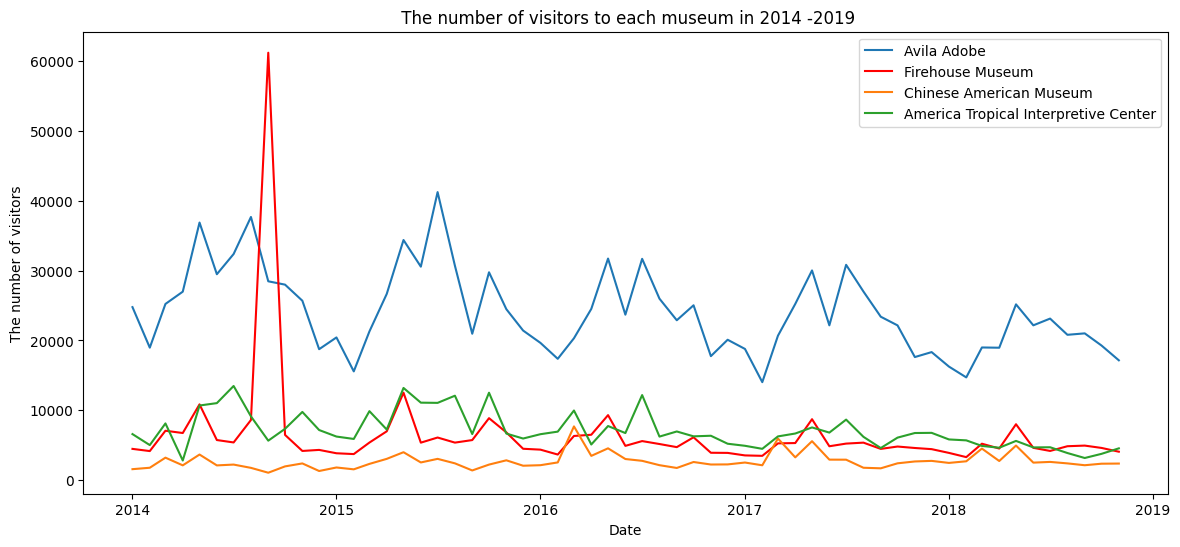

In [28]:
# Line chart showing the number of visitors to each museum over time
# Your code here

# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title(" The number of visitors to each museum in 2014 -2019")

sns.lineplot(data=museum_data['Avila Adobe'], label="Avila Adobe")
sns.lineplot(data=museum_data['Firehouse Museum'], label="Firehouse Museum", color="red")
sns.lineplot(data=museum_data['Chinese American Museum'], label="Chinese American Museum")
sns.lineplot(data=museum_data['America Tropical Interpretive Center'], label="America Tropical Interpretive Center")

# Add label for horizontal axis
plt.xlabel("Date")
plt.ylabel("The number of visitors")


<ipython-input-29-c36b7c459b89>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in avila_adobe_visitors.iteritems():
<ipython-input-29-c36b7c459b89>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in firehouse_visitors.iteritems():
<ipython-input-29-c36b7c459b89>:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in chinese_american_visitors.iteritems():
<ipython-input-29-c36b7c459b89>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in america_tropical_interpretive_center_visitors.iteritems():


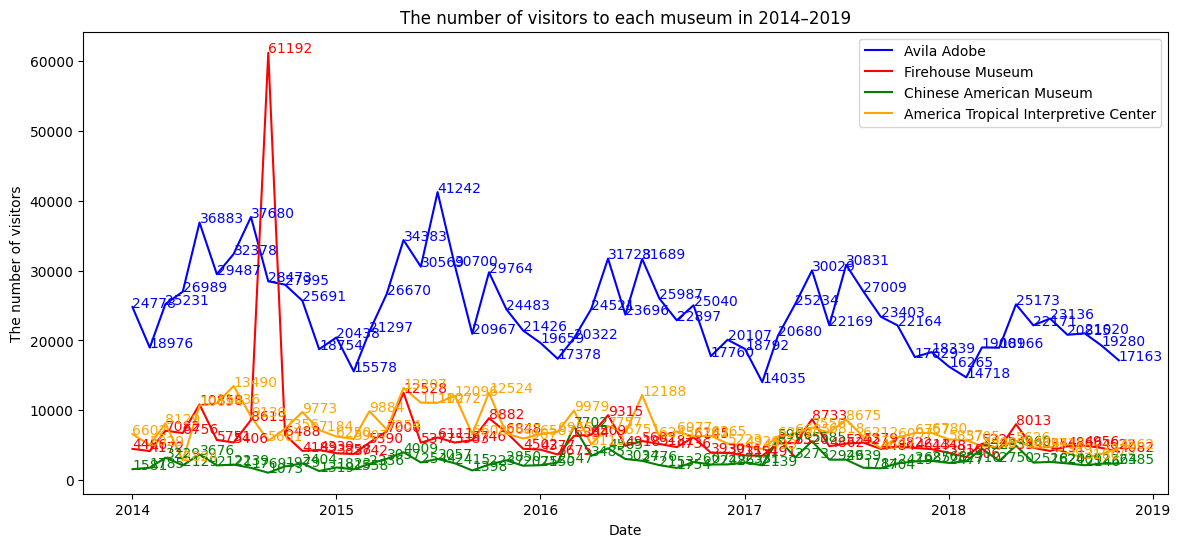

In [29]:
# 假设 'Date' 列是 DataFrame 的索引
dates = museum_data.index
avila_adobe_visitors = museum_data['Avila Adobe']
firehouse_visitors = museum_data['Firehouse Museum']
chinese_american_visitors = museum_data['Chinese American Museum']
america_tropical_interpretive_center_visitors = museum_data['America Tropical Interpretive Center']


plt.figure(figsize=(14, 6))  # 调整图表大小
plt.title("The number of visitors to each museum in 2014–2019")

# 绘制折线图
sns.lineplot(data=avila_adobe_visitors, label="Avila Adobe", color="blue")
sns.lineplot(data=firehouse_visitors, label="Firehouse Museum", color="red")
sns.lineplot(data=chinese_american_visitors, label="Chinese American Museum", color="green")
sns.lineplot(data=america_tropical_interpretive_center_visitors, label="America Tropical Interpretive Center", color='orange')


# 选择要标注的点 (例如，每年的最后一个月份)
for date, value in avila_adobe_visitors.iteritems():
    plt.text(date, value, str(value), color='blue')  # 标注 Avila Adobe 的值

for date, value in firehouse_visitors.iteritems():
    plt.text(date, value, str(value), color='red')  # 标注 Firehouse Museum 的值

for date, value in chinese_american_visitors.iteritems():
    plt.text(date, value, str(value), color='green')  # 标注 Chinese American Museum 的值

for date, value in america_tropical_interpretive_center_visitors.iteritems():
    plt.text(date, value, str(value), color='orange')  # 标注 America Tropical Interpretive Center 的值

plt.xlabel("Date")
plt.ylabel("The number of visitors")
plt.legend()
plt.show()

## Step 4: Assess seasonality

When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

#### Part A
Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.  (_If your code returns an error, the first thing that you should check is that you've spelled the name of the column correctly!  You must write the name of the column exactly as it appears in the dataset._)

Text(0, 0.5, 'The number of visitors')

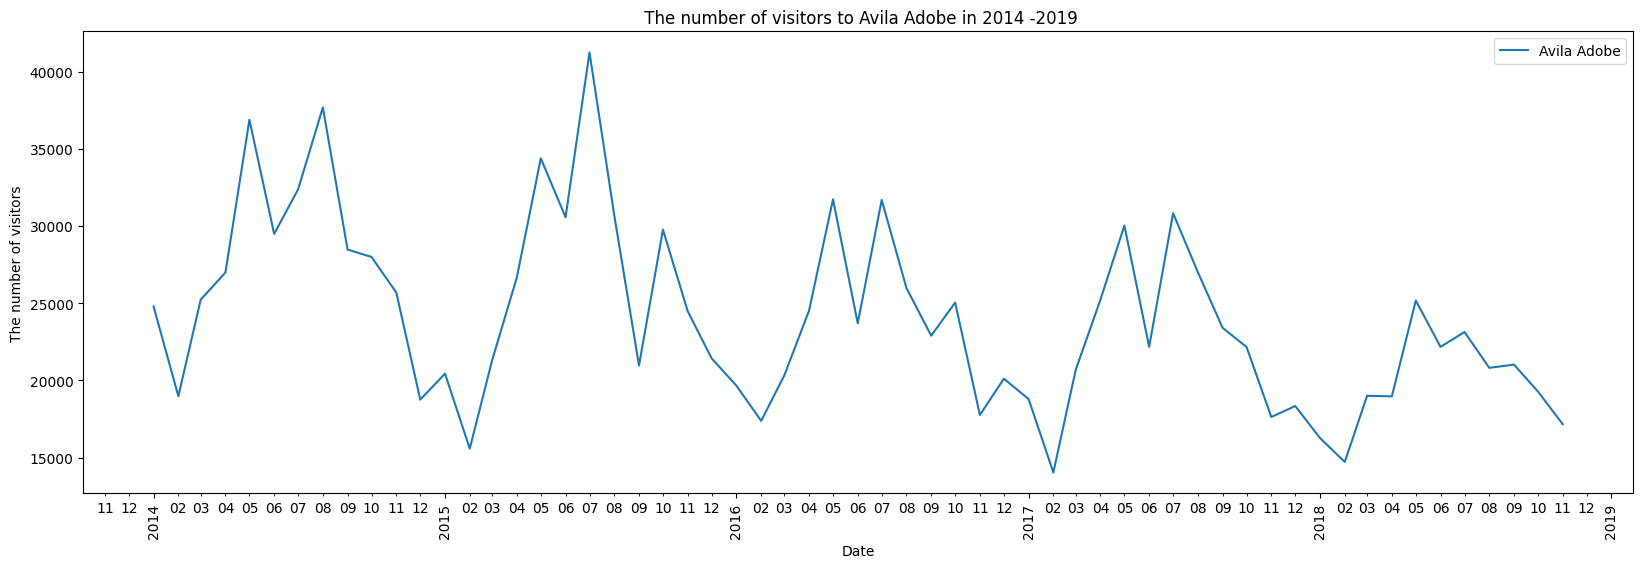

In [33]:
# Line plot showing the number of visitors to Avila Adobe over time
# Your code here

import matplotlib.dates as mdates #日期

plt.figure(figsize=(20,6))

# Add title
plt.title(" The number of visitors to Avila Adobe in 2014 -2019")

sns.lineplot(data=museum_data['Avila Adobe'], label="Avila Adobe")

#标记年和月份
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

plt.xticks(rotation=90)

# Add label for horizontal axis

plt.xlabel("Date")
plt.ylabel("The number of visitors")

#### Part B

Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or
- in March-August (in LA, the spring and summer)?  

Using this information, when should the museum staff additional seasonal employees?

# **the spring and summer**

#3. Bar Charts and Heatmaps
Use color or length to compare categories in a dataset

Now that you can create your own line charts, it's time to learn about more chart types!

By the way, if this is your first experience with writing code in Python, you should be very proud of all that you have accomplished so far, because it's never easy to learn a completely new skill! If you stick with the course, you'll notice that everything will only get easier (while the charts you'll build will get more impressive!), since the code is pretty similar for all of the charts. Like any skill, coding becomes natural over time, and with repetition.

In this tutorial, you'll learn about bar charts and heatmaps.

##Set up the notebook
As always, we begin by setting up the coding environment.

In [34]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Select a dataset
In this tutorial, we'll work with a dataset from the US Department of Transportation that tracks flight delays.

Opening this CSV file in Excel shows a row for each month (where 1 = January, 2 = February, etc) and a column for each airline code.



Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015). Negative entries denote flights that (on average) tended to arrive early. For instance, the average American Airlines flight (airline code: AA) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (airline code: AS) in April arrived roughly 3 minutes early.

##Load the data
As before, we load the dataset using the pd.read_csv command.

In [38]:
# Path of the file to read
flight_filepath = "./sample_data/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month") #index_col是把哪一行排在前面

You may notice that the code is slightly shorter than what we used in the previous tutorial. In this case, since the row labels (from the 'Month' column) don't correspond to dates, we don't add parse_dates=True in the parentheses. But, we keep the first two pieces of text as before, to provide both:

the filepath for the dataset (in this case, flight_filepath), and
the name of the column that will be used to index the rows (in this case, index_col="Month").


#Examine the data

Since the dataset is small, we can easily print all of its contents. This is done by writing a single line of code with just the name of the dataset.

In [ ]:
# Print the data
flight_data

Year  Day  DayOfWeek Flight_Date UniqueCarrier Tai_lNum  FlightNum  \
Month                                                                       
7      2016    1          5  01/07/2016            AA   N793AA          1   
7      2016    2          6  02/07/2016            AA   N784AA          1   
7      2016    4          1  04/07/2016            AA   N785AA          1   
7      2016    5          2  05/07/2016            AA   N790AA          1   
7      2016    6          3  06/07/2016            AA   N799AA          1   
...     ...  ...        ...         ...           ...      ...        ...   
7      2016   21          4  21/07/2016            AA   N892AA        146   
7      2016   22          5  22/07/2016            AA   N855AA        146   
7      2016   24          7  24/07/2016            AA   N3AVAA        146   
7      2016   25          1  25/07/2016            AA   N886AA        146   
7      2016   26          2  26/07/2016            AA   N874AA        146   

      Origin_Airport Origin_City_Name Origin_State  ...  Carrier_Delay  \
Month                                               ...                  
7                BOS       Boston, MA           MA  ...              0   
7                BOS       Boston, MA           MA  ...              0   
7                BOS       Boston, MA           MA  ...              0   
7                BOS       Boston, MA           MA  ...              0   
7                BOS       Boston, MA           MA  ...              0   
...              ...              ...          ...  ...            ...   
7                LAX  Los Angeles, CA           CA  ...             30   
7                LAX  Los Angeles, CA           CA  ...              0   
7                LAX  Los Angeles, CA           CA  ...              0   
7                LAX  Los Angeles, CA           CA  ...              0   
7                LAX  Los Angeles, CA           CA  ...             87   

       WeatherDelay  NAS_Delay  Security_Delay  Late_Aircraft_Delay  \
Month                                                                 
7                 0          0               0                    0   
7                 0          0               0                    0   
7                 0          0               0                    0   
7                 0          0               0                    0   
7                 0          0               0                    0   
...             ...        ...             ...                  ...   
7                 0          6               0                    0   
7                 0          0               0                    0   
7                 0          0               0                    0   
7                 0         17               0                    0   
7                 0          0               0                    0   

       Top_Carriers  Top_Origin  DEPTIME_GROUP1  DEPTIME_GROUP2  \
Month                                                             
7                 1           1       0000-0600       0400-0600   
7                 1           1       0000-0600       0400-0600   
7                 1           1       0600-1200       0600-0800   
7                 1           1       0000-0600       0400-0600   
7                 1           1       0000-0600       0400-0600   
...             ...         ...             ...             ...   
7                 1           1       0600-1200       0800-1000   
7                 1           1       0600-1200       0800-1000   
7                 1           1       0600-1200       0800-1000   
7                 1           1       0600-1200       0800-1000   
7                 1           1       0600-1200       0800-1000   

       DEPTIME_GROUP3  
Month                  
7           0500-0600  
7           0500-0600  
7           0600-0700  
7           0500-0600  
7           0500-0600  
...               ...  
7           0800-0900  
7           0800-0900  
7     

from matplotlib import pyplot as plt
flight_data['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data['DayOfWeek'].plot(kind='hist', bins=20, title='DayOfWeek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data['FlightNum'].plot(kind='hist', bins=20, title='FlightNum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data['Scheduled_Departure'].plot(kind='hist', bins=20, title='Scheduled_Departure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
flight_data.groupby('DEPTIME_GROUP1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data.plot(kind='scatter', x='Day', y='DayOfWeek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data.plot(kind='scatter', x='DayOfWeek', y='FlightNum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data.plot(kind='scatter', x='FlightNum', y='Scheduled_Departure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
flight_data.plot(kind='scatter', x='Scheduled_Departure', y='Departure_Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = flight_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DEPTIME_GROUP1')):
  _plot_series(series, series_name, i)
  fig.legend(title='DEPTIME_GROUP1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['DayOfWeek']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = flight_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DEPTIME_GROUP1')):
  _plot_series(series, series_name, i)
  fig.legend(title='DEPTIME_GROUP1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('DayOfWeek')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['FlightNum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = flight_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DEPTIME_GROUP1')):
  _plot_series(series, series_name, i)
  fig.legend(title='DEPTIME_GROUP1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('FlightNum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Scheduled_Departure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = flight_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DEPTIME_GROUP1')):
  _plot_series(series, series_name, i)
  fig.legend(title='DEPTIME_GROUP1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Scheduled_Departure')

from matplotlib import pyplot as plt
flight_data['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
flight_data['DayOfWeek'].plot(kind='line', figsize=(8, 4), title='DayOfWeek')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
flight_data['FlightNum'].plot(kind='line', figsize=(8, 4), title='FlightNum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
flight_data['Scheduled_Departure'].plot(kind='line', figsize=(8, 4), title='Scheduled_Departure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(flight_data['DEPTIME_GROUP1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(flight_data, x='Day', y='DEPTIME_GROUP1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(flight_data['DEPTIME_GROUP1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(flight_data, x='DayOfWeek', y='DEPTIME_GROUP1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(flight_data['DEPTIME_GROUP1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(flight_data, x='FlightNum', y='DEPTIME_GROUP1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(flight_data['DEPTIME_GROUP1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(flight_data, x='Scheduled_Departure', y='DEPTIME_GROUP1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Bar chart
Say we'd like to create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

<ipython-input-44-77fab0c3579c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_data.index, y=flight_data['NK'], palette='rainbow')


Text(0, 0.5, 'Arrival delay (in minutes)')

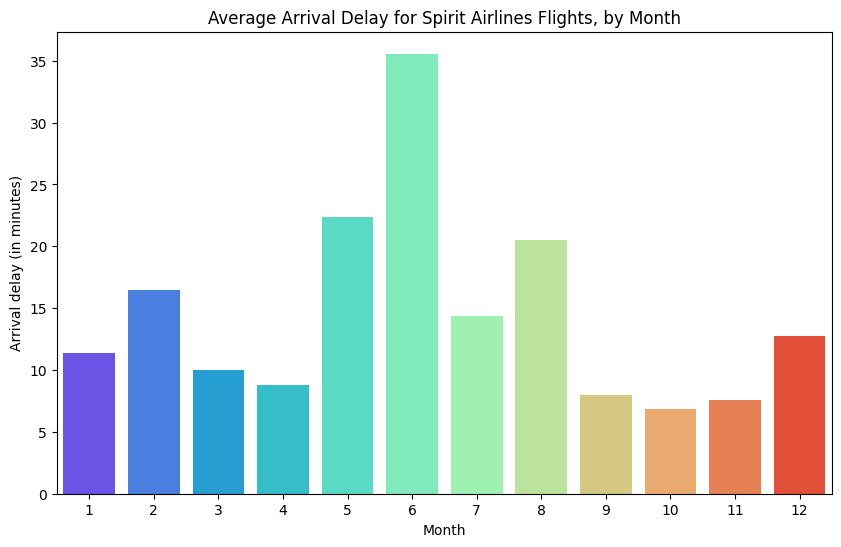

In [44]:
# Path of the file to read
flight_filepath = "./sample_data/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

# Print the data
flight_data

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'], palette='rainbow')

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous tutorial. The code that creates the bar chart is new:

<ipython-input-45-0cc4c2e0f769>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_data.index, y=flight_data['NK'], palette='rainbow')


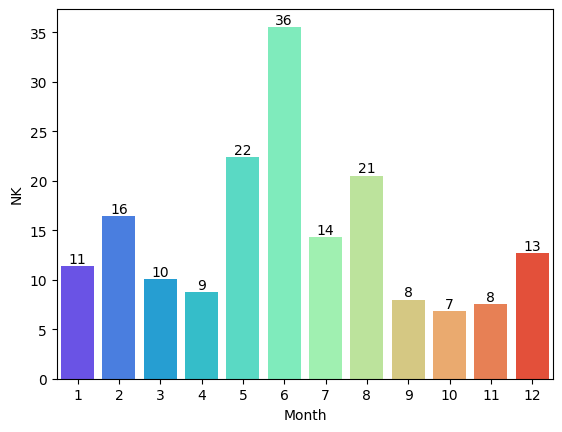

In [45]:
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'], palette='rainbow')

# 在每个条形上方添加文本标注
for index, value in enumerate(flight_data['NK']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')


The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous tutorial. The code that creates the bar chart is new:


Bar chart showing average arrival delay for Spirit Airlines flights by month
```
sns.barplot(x=flight_data.index, y=flight_data['NK'])
```
It has three main components:

sns.barplot - This tells the notebook that we want to create a bar chart.
Remember that sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix.

x=flight_data.index - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case, the column containing the months).

y=flight_data['NK'] - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.

**Important Note:** You must select the indexing column with flight_data.index, and it is not possible to use flight_data['Month'] (which will return an error). This is because when we loaded the dataset, the "Month" column was used to index the rows. We always have to use this special notation to select the indexing column.

#Heatmap
We have one more plot type to learn about: heatmaps!

In the code cell below, we create a heatmap to quickly visualize patterns in flight_data. Each cell is color-coded according to its corresponding value.

Text(0.5, 47.7222222222222, 'Airline')

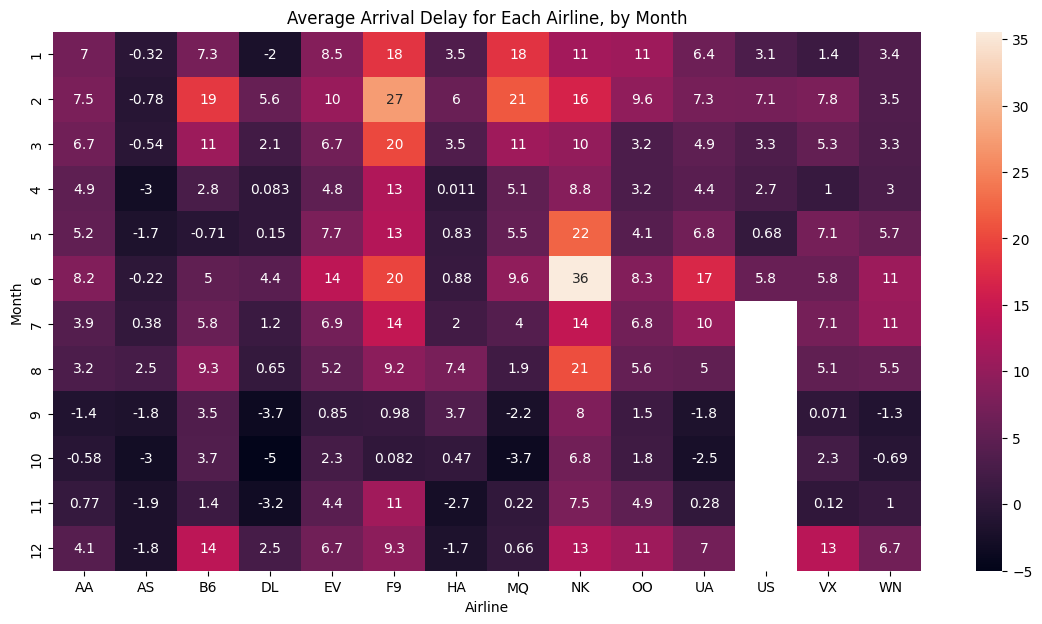

In [48]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

Text(0.5, 47.7222222222222, 'Airline')

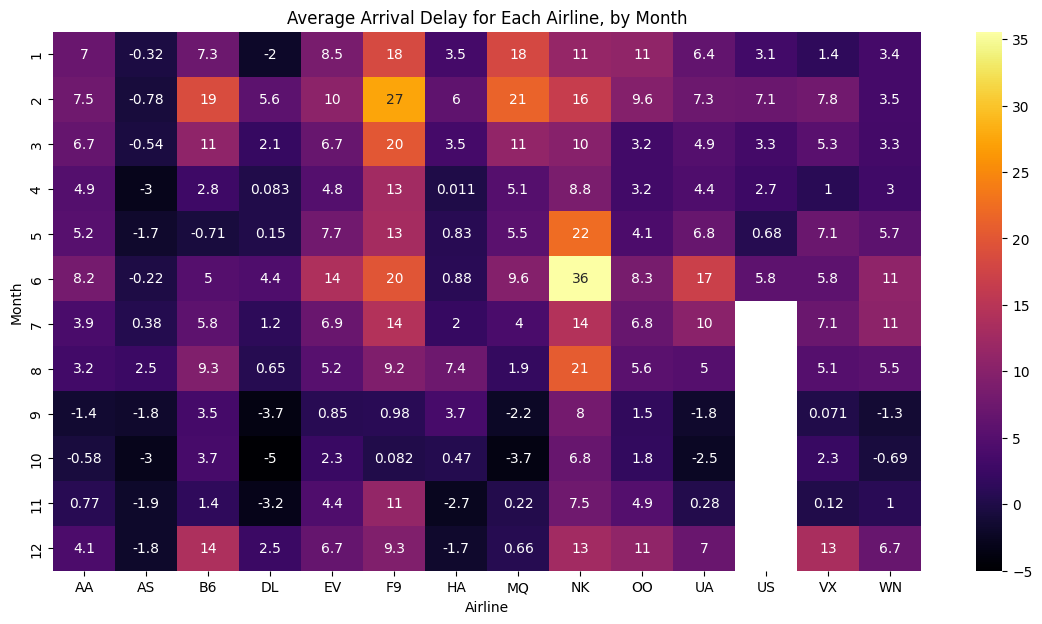

In [51]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True, cmap='inferno')

# Add label for horizontal axis
plt.xlabel("Airline")



```
# This is formatted as code
```



The relevant code to create the heatmap is as follows:
```
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)
```
This code has three main components:

- sns.heatmap - This tells the notebook that we want to create a heatmap.

- data=flight_data - This tells the notebook to use all of the entries in flight_data to create the heatmap.

- annot=True - This ensures that the values for each cell appear on the chart.
(Leaving this out removes the numbers from each of the cells!)

What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!

#Exercise: Bar Charts and Heatmaps

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **bar charts** and **heatmaps** to understand patterns in the data.

## Scenario

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

![ex2_ign](https://storage.googleapis.com/kaggle-media/learn/images/Oh06Fu1.png)

You're interested in using [IGN reviews](https://www.ign.com/reviews/games) to guide the design of your upcoming game.  Thankfully, someone has summarized the rankings in a really useful CSV file that you can use to guide your analysis.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Step 1: Load the data

Read the IGN data file into `ign_data`.  Use the `"Platform"` column to label the rows.

In [85]:
# Path of the file to read
ign_filepath = "./sample_data/ign_scores.csv"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(ign_filepath)


## Step 2: Review the data

Use a Python command to print the entire dataset.

In [86]:
# Print the data
ign_data # Your code here

Platform    Action  Action, Adventure  Adventure  Fighting  \
0              Dreamcast  6.882857           7.511111   6.281818  8.200000   
1       Game Boy Advance  6.373077           7.507692   6.057143  6.226316   
2         Game Boy Color  6.272727           8.166667   5.307692  4.500000   
3               GameCube  6.532584           7.608333   6.753846  7.422222   
4           Nintendo 3DS  6.670833           7.481818   7.414286  6.614286   
5            Nintendo 64  6.649057           8.250000   7.000000  5.681250   
6            Nintendo DS  5.903608           7.240000   6.259804  6.320000   
7           Nintendo DSi  6.827027           8.500000   6.090909  7.500000   
8                     PC  6.805791           7.334746   7.136798  7.166667   
9            PlayStation  6.016406           7.933333   6.313725  6.553731   
10         PlayStation 2  6.467361           7.250000   6.315152  7.306349   
11         PlayStation 3  6.853819           7.306154   6.820988  7.710938   
12         PlayStation 4  7.550000           7.835294   7.388571  7.280000   
13  PlayStation Portable  6.467797           7.000000   6.938095  6.822222   
14      PlayStation Vita  7.173077           6.133333   8.057143  7.527273   
15                   Wii  6.262718           7.294643   6.234043  6.733333   
16              Wireless  7.041699           7.312500   6.972414  6.740000   
17                  Xbox  6.819512           7.479032   6.821429  7.029630   
18              Xbox 360  6.719048           7.137838   6.857353  7.552239   
19              Xbox One  7.702857           7.566667   7.254545  7.171429   
20                iPhone  6.865445           7.764286   7.745833  6.087500   

    Platformer    Puzzle       RPG    Racing   Shooter  Simulation    Sports  \
0     8.340000  8.088889  7.700000  7.042500  7.616667    7.628571  7.272222   
1     6.970588  6.532143  7.542857  6.657143  6.444444    6.928571  6.694444   
2     6.352941  6.583333  7.285714  5.897436  4.500000    5.900000  5.790698   
3     6.665714  6.133333  7.890909  6.852632  6.981818    8.028571  7.481319   
4     7.503448  8.000000  7.719231  6.900000  7.033333    7.700000  6.388889   
5     6.889655  7.461538  6.050000  6.939623  8.042857    5.675000  6.967857   
6     6.840000  6.604615  7.222619  6.038636  6.965217    5.874359  5.936667   
7     7.250000  6.810526  7.166667  6.563636  6.500000    5.195652  5.644444   
8     7.410938  6.924706  7.759930  7.032418  7.084878    7.104889  6.902424   
9     6.579070  6.757895  7.910000  6.773387  6.424000    6.918182  6.751220   
10    7.068421  6.354545  7.473077  6.585065  6.641667    7.152632  7.197826   
11    7.735714  7.350000  7.436111  6.978571  7.219553    7.142857  7.485816   
12    8.390909  7.400000  7.944000  7.590000  7.804444    9.250000  7.430000   
13    7.194737  6.726667  6.817778  6.401961  7.071053    6.761538  6.956790   
14    8.568750  8.250000  7.337500  6.300000  7.660000    5.725000  7.130000   
15    7.054255  6.426984  7.410345  5.011667  6.479798    6.327027  5.966901   
16    7.509091  7.360550  8.260000  6.898305  6.906780    7.802857  7.417699   
17    7.303448  5.125000  8.277778  7.021591  7.485417    7.155556  7.884397   
18    7.559574  7.141026  7.650000  6.996154  7.338153    7.325000  7.317857   
19    6.733333  8.100000  8.291667  8.163636  8.020000    7.733333  7.331818   
20    7.471930  7.810784  7.185185  7.315789  6.995588    7.328571  7.152174   

    Strategy  
0   6.433333  
1   7.175000  
2   7.400000  
3   7.116667  
4   7.900000  
5   6.900000  
6   6.644737  
7   6.566667  
8   7.310207  
9   6.496875  
10  7.238889  
11  7.355172  
12  6.566667  
13  6.550000  
14  8.900000  
15  6.975000  
16  7.542857  
17  7.313333  
18  7.112245  
19  8.500000  
20  7.534921

The dataset that you've just printed shows the average score, by platform and genre.  Use the data to answer the questions below.

In [ ]:
# Fill in the line below: What is the highest average score received by PC games,
# for any genre?
high_score = 'RPG'

# Fill in the line below: On the Playstation Vita platform, which genre has the
# lowest average score? Please provide the name of the column, and put your answer
# in single quotes (e.g., 'Action', 'Adventure', 'Fighting', etc.)
worst_genre = 'Simulation'

## Step 3: Which platform is best?

Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.

#### Part A

Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform.

<ipython-input-95-6c2be1f41763>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ign_data['Platform'], y=ign_data['Racing'], palette='rainbow')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Dreamcast'),
  Text(1, 0, 'Game Boy Advance'),
  Text(2, 0, 'Game Boy Color'),
  Text(3, 0, 'GameCube'),
  Text(4, 0, 'Nintendo 3DS'),
  Text(5, 0, 'Nintendo 64'),
  Text(6, 0, 'Nintendo DS'),
  Text(7, 0, 'Nintendo DSi'),
  Text(8, 0, 'PC'),
  Text(9, 0, 'PlayStation'),
  Text(10, 0, 'PlayStation 2'),
  Text(11, 0, 'PlayStation 3'),
  Text(12, 0, 'PlayStation 4'),
  Text(13, 0, 'PlayStation Portable'),
  Text(14, 0, 'PlayStation Vita'),
  Text(15, 0, 'Wii'),
  Text(16, 0, 'Wireless'),
  Text(17, 0, 'Xbox'),
  Text(18, 0, 'Xbox 360'),
  Text(19, 0, 'Xbox One'),
  Text(20, 0, 'iPhone')])

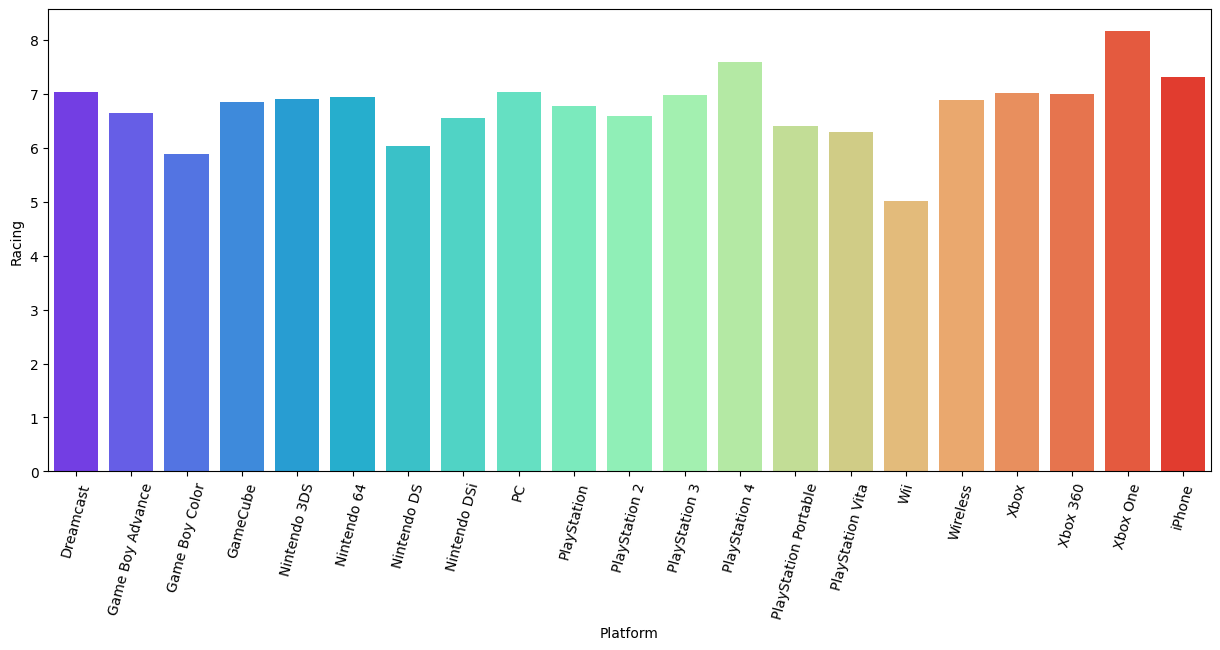

In [95]:
# Bar chart showing average score for racing games by platform
# Your code here
plt.figure(figsize=(15,6))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=ign_data['Platform'], y=ign_data['Racing'], palette='rainbow')

plt.xticks(rotation=75)

#### Part B

Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?

## Step 4: All possible combinations!

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

#### Part A

Use the data to create a heatmap of average score by genre and platform.

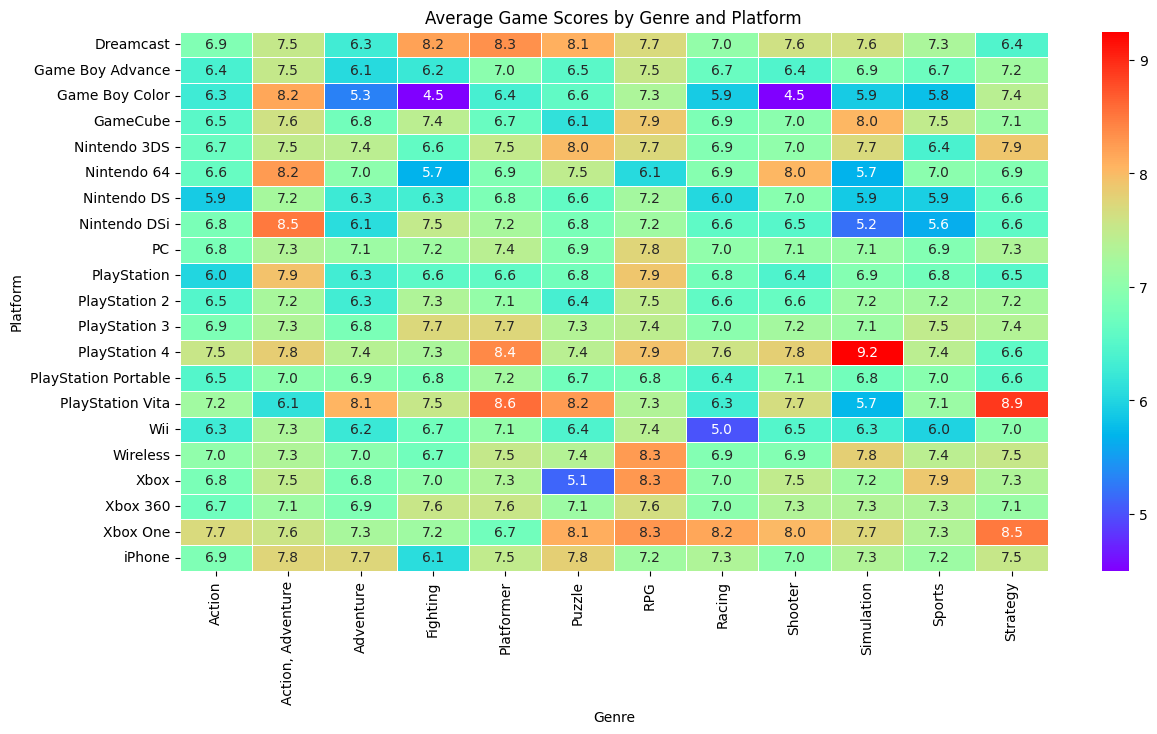

In [104]:
# Heatmap showing average game score by platform and genre
# Your code here
# Set the width and height of the figure
plt.figure(figsize=(14, 7))
plt.title("Average Game Scores by Genre and Platform")
sns.heatmap(data=ign_data.set_index('Platform'), annot=True, fmt=".1f", linewidths=.5, cmap="rainbow") #。annot=True 参数添加了每个单元格的注释标签，fmt=".1f" 设置了标签的格式为一位小数的浮点数。linewidths=.5 添加了单元格之间的线条以便区分
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.show()



#### Part B

Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

#4. Scatter Plots
Leverage the coordinate plane to explore relationships between variables

In this tutorial, you'll learn how to create advanced scatter plots.

Set up the notebook
As always, we begin by setting up the coding environment.

In [52]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


##Load and examine the data
We'll work with a (synthetic) dataset of insurance charges, to see if we can understand why some customers pay more than others.

If you like, you can read more about the dataset [here](https://www.kaggle.com/datasets/mirichoi0218/insurance).

In [53]:
# Path of the file to read
insurance_filepath = "./sample_data/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

As always, we check that the dataset loaded properly by printing the first five rows.

In [54]:
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

##Scatter plots

To create a simple scatter plot, we use the sns.scatterplot command and specify the values for:

- the horizontal x-axis (x=insurance_data['bmi']), and
- the vertical y-axis (y=insurance_data['charges']).

<Axes: xlabel='bmi', ylabel='charges'>

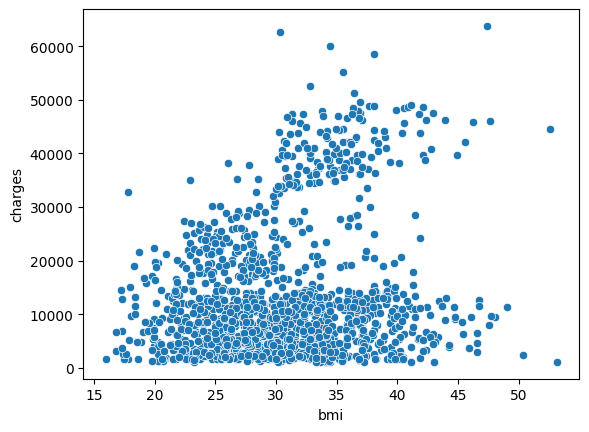

In [55]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

<Axes: xlabel='bmi', ylabel='charges'>

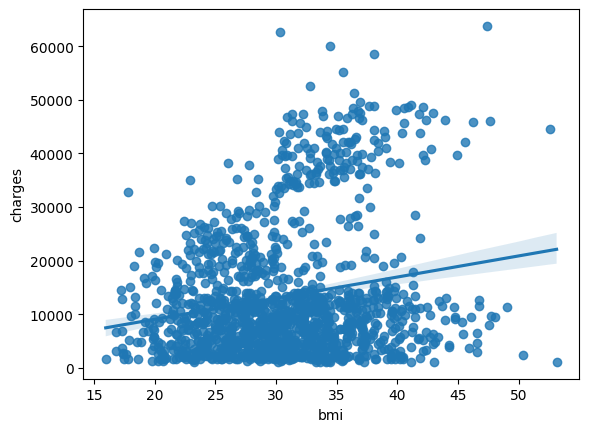

In [56]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

##Color-coded scatter plots
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

<Axes: xlabel='bmi', ylabel='charges'>

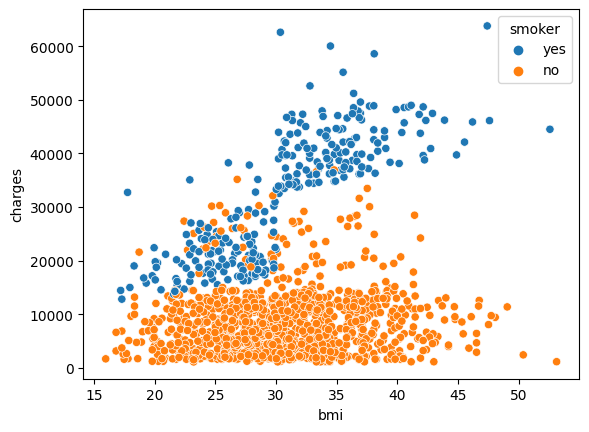

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

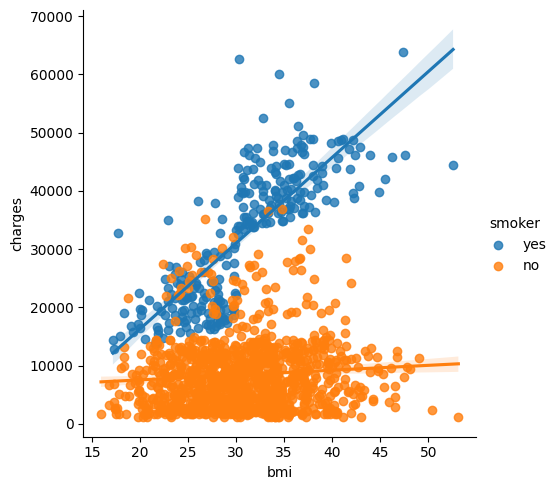

In [57]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

The sns.lmplot command above works slightly differently than the commands you have learned about so far:

- Instead of setting x=insurance_data['bmi'] to select the 'bmi' column in insurance_data, we set x="bmi" to specify the name of the column only.
- Similarly, y="charges" and hue="smoker" also contain the names of columns.
- We specify the dataset with data=insurance_data.

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


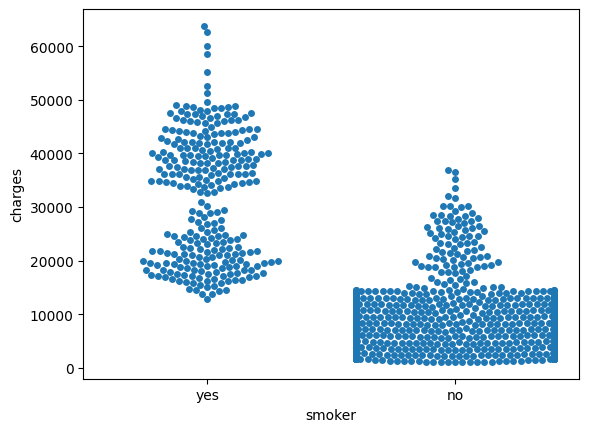

In [58]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:

on average, non-smokers are charged less than smokers, and
the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

#Exercise: Scatter Plots

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [71]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Step 1: Load the Data

Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.

In [83]:
# Path of the file to read
candy_filepath = "./sample_data/candy-data.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath)



## Step 2: Review the data

Use a Python command to print the first five rows of the data.

In [84]:
# Print the first five rows of the data
candy_data.head() # Your code here

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
winpercent                                                                      
66.971725       100 Grand          1       0        1               0       0   
67.602936    3 Musketeers          1       0        0               0       1   
32.261086        One dime          0       0        0               0       0   
46.116505     One quarter          0       0        0               0       0   
52.341465       Air Heads          0       1        0               0       0   

            crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  
winpercent                                                                     
66.971725                  1     0    1         0         0.732         0.860  
67.602936                  0     0    1         0         0.604         0.511  
32.261086                  0     0    0         0         0.011         0.116  
46.116505                  0     0    0         0         0.011         0.511  
52.341465                  0     0    0         0         0.906         0.511

The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar.
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

Use the first five rows of the data to answer the questions below.

In [ ]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
#more_popular = 3 Musketeers

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
#more_sugar = Air Heads

In [70]:

# 载入数据到 DataFrame
candy_data = pd.read_csv(candy_filepath) # 替换为你的文件路径和文件名

# 假设 'winpercent' 列包含受欢迎程度，'candy_name' 列包含糖果名称
sorted_df = candy_data.sort_values(by='winpercent', ascending=False)

# 获取最受欢迎的糖果名称
more_popular = sorted_df.iloc[0]['competitorname']  # 获取排序后的第一行的糖果名称

print(more_popular)

Reese's Peanut Butter cup


## Step 3: The role of sugar
​
Do people tend to prefer candies with higher sugar content?  
​
#### Part A
​
Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

<Axes: xlabel='winpercent', ylabel='sugarpercent'>

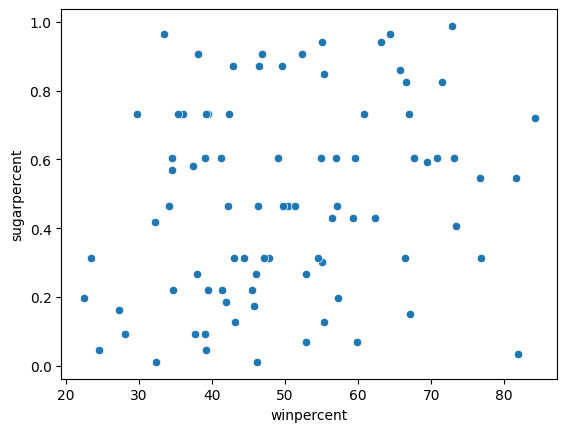

In [74]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
 # Your code here

sns.scatterplot(x=candy_data['winpercent'], y=candy_data['sugarpercent'])

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

<Axes: xlabel='winpercent', ylabel='sugarpercent'>

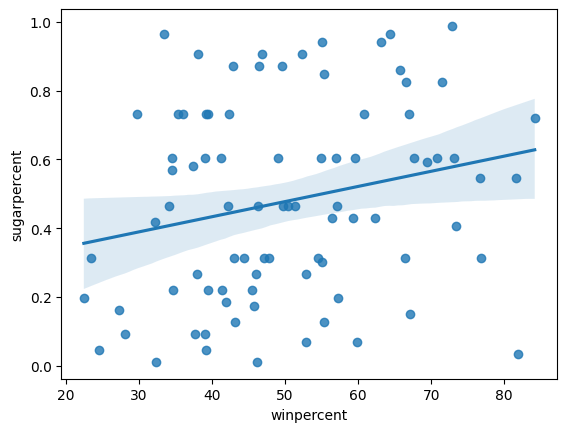

In [75]:
sns.regplot(x=candy_data['winpercent'], y=candy_data['sugarpercent'])

## Step 4: Take a closer look

#### Part A

Create the same scatter plot you created in **Step 3**, but now with a regression line!

<Axes: xlabel='winpercent', ylabel='sugarpercent'>

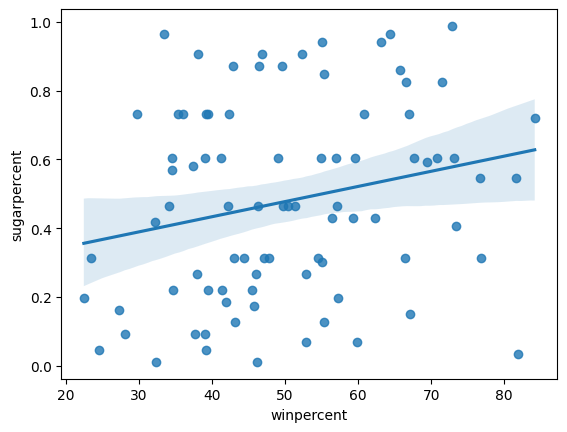

In [76]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['winpercent'], y=candy_data['sugarpercent'])# Your code here

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

So-so, it doesn’t seem to matter

## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_

<Axes: xlabel='winpercent', ylabel='sugarpercent'>

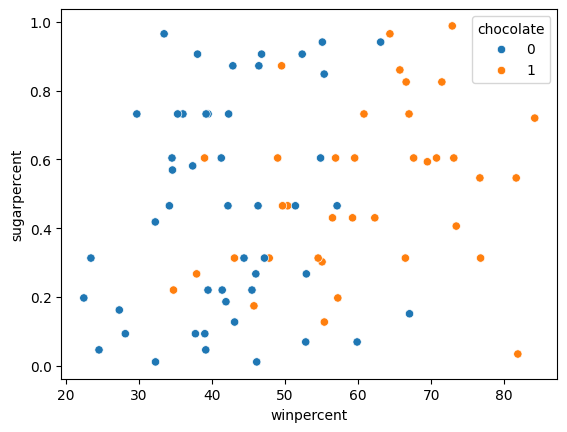

In [77]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
 # Your code here
sns.scatterplot(x=candy_data['winpercent'], y=candy_data['sugarpercent'], hue=candy_data['chocolate'])


Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!

## Step 6: Investigate chocolate

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

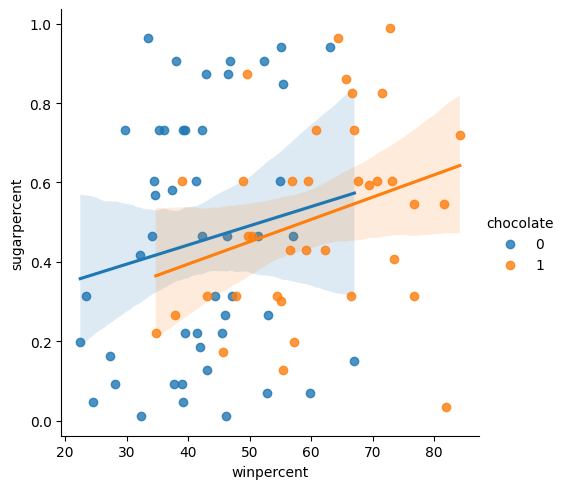

In [79]:
# Color-coded scatter plot w/ regression line
# Your code here
sns.lmplot(x="winpercent", y="sugarpercent", hue="chocolate", data=candy_data)

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

## Step 7: Everybody loves chocolate.

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

<Axes: xlabel='chocolate', ylabel='winpercent'>

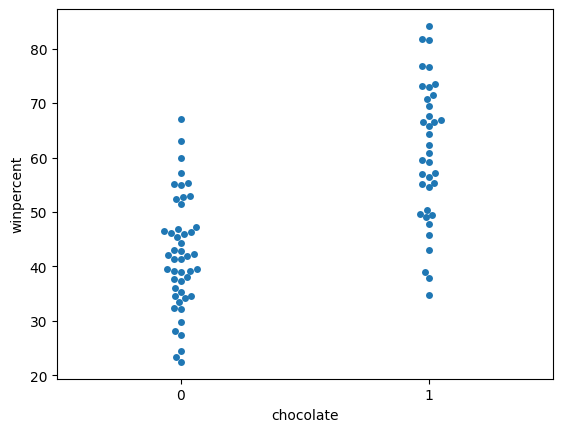

In [81]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
# Your code here
sns.swarmplot(x=candy_data['chocolate'],
              y=candy_data['winpercent'])


#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?

Homework: https://www.kaggle.com/code/alexisbcook/distributions/tutorial